# Principal Component Analysis (PCA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('Group_1_Clean_Data.csv', low_memory=False)
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,9,0.0,100217,1995.000000,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.006101,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,9,0.0,100220,1474.000000,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.006101,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,9,0.0,100755,4862.000000,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.006101,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,9,0.0,100880,1915.000000,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.016710,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,9,0.0,100887,4051.319086,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.017340,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame
# Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols]


,Kingdom,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,9,0.0,100217,1995.000000,0.01654,0.01203,0.00050,0.00351,0.01203,0.032080,...,0.00451,0.01303,0.006101,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.000000
1,9,0.0,100220,1474.000000,0.02714,0.01357,0.00068,0.00678,0.00407,0.028490,...,0.00136,0.01696,0.006101,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.000000
2,9,0.0,100755,4862.000000,0.01974,0.02180,0.01357,0.01543,0.00782,0.011110,...,0.00596,0.01974,0.006101,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.001440
3,9,0.0,100880,1915.000000,0.01775,0.02245,0.01619,0.00992,0.01567,0.013580,...,0.00366,0.01410,0.016710,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.000000
4,9,0.0,100887,4051.319086,0.02816,0.01371,0.00767,0.03679,0.01380,0.005480,...,0.00604,0.01494,0.017340,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.001310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,7,0.0,9601,1097.000000,0.02552,0.03555,0.00547,0.01367,0.01276,0.020970,...,0.00820,0.01367,0.010940,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.000880
13024,7,1.0,9601,2067.000000,0.01258,0.03193,0.01984,0.00629,0.01451,0.016396,...,0.00145,0.00000,0.000480,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.001012
13025,7,1.0,9602,1686.000000,0.01423,0.03321,0.01661,0.00356,0.01127,0.015832,...,0.00000,0.00000,0.000000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.001012
13026,7,0.0,9606,4051.319086,0.01757,0.02028,0.00767,0.01293,0.01319,0.019590,...,0.00359,0.01217,0.011960,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.001560


In [5]:
scaled_data = preprocessing.scale(df[numerical_cols[1:]])

# If you need to keep the original DataFrame structure:
df[numerical_cols[1:]] = scaled_data

In [6]:
scaled_data

array([[-0.58855028, -0.24229483, -0.59412898, ...,  0.98452546,
         0.13912498, -1.58380152],
       [-0.58855028, -0.24227079, -0.95406585, ...,  1.16926883,
         0.55843151, -1.58380152],
       [-0.58855028, -0.23798333,  1.38656009, ...,  2.27772906,
        -1.02561539,  1.39812982],
       ...,
       [ 1.09773526, -0.96847958, -0.80760402, ...,  1.95442816,
         1.74646668,  0.5122042 ],
       [-0.58855028, -0.96844752,  0.82649492, ..., -0.41952417,
         0.81467439,  1.6466241 ],
       [ 1.09773526, -0.96844752,  0.82649492, ...,  0.10699444,
         1.62999264,  0.5122042 ]])

In [7]:
pca = PCA()   # perform PCA and get 68 new coordinates

pca.fit(scaled_data)

PCA()

In [8]:
# We look at the explained variance ratio for each PC to see how many we should use
# to reduce the dimensionality from 68

per_var = np.round(pca.explained_variance_ratio_*100, 1)
print(per_var)

[26.6 15.9  5.1  3.7  3.2  2.8  2.4  1.9  1.8  1.6  1.5  1.4  1.3  1.3
  1.2  1.1  1.1  1.   1.   0.9  0.9  0.8  0.8  0.8  0.8  0.7  0.7  0.7
  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2]


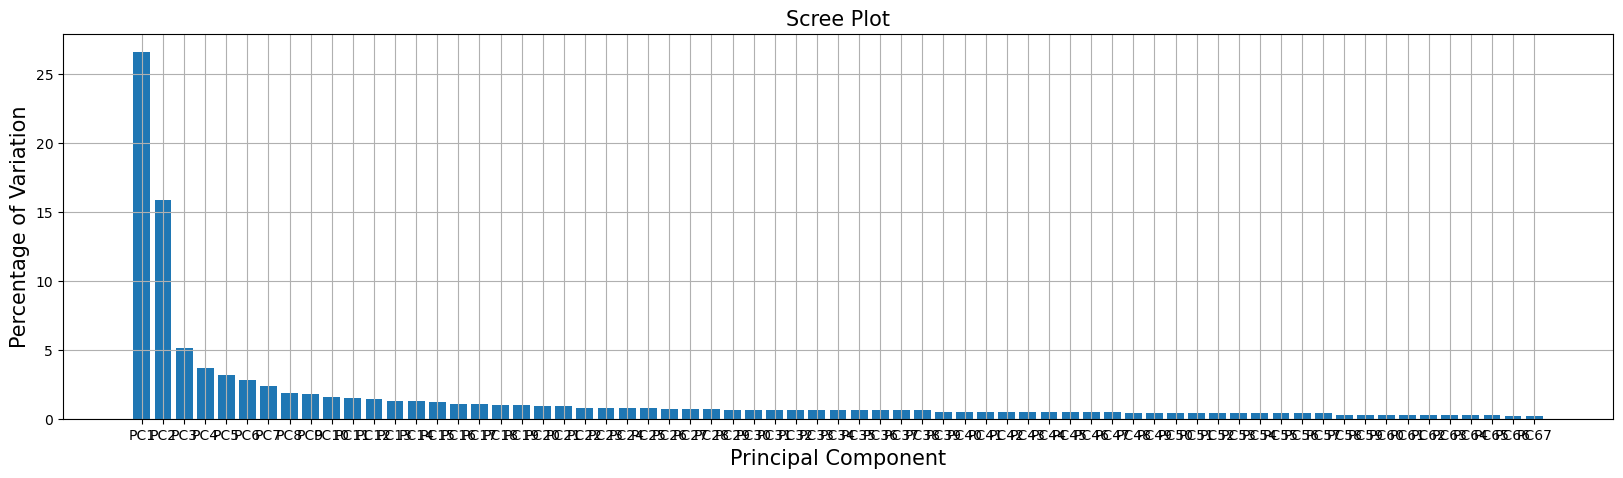

In [9]:
plt.figure(figsize = (20,5))

princ_comp = ["PC" + str(x) for x in range(1, 68)]

plt.bar(x = range(1, 68), height = per_var, tick_label = princ_comp)
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [10]:
feature_names = df.columns[2:]  # Exclude the last column if it was dropped for PCA
pd.DataFrame(pca.components_.T, columns=princ_comp, index=feature_names)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
SpeciesID,-0.093462,0.170799,0.102755,0.283687,-0.071099,0.157836,0.070180,-0.093426,-0.076094,0.034987,...,0.119391,0.039646,-0.201817,-0.290159,-0.035826,0.146802,-0.227400,0.103123,0.483566,0.353114
Ncodons,-0.010370,0.011496,0.040396,0.037789,-0.040164,-0.114632,0.039898,0.440574,0.070795,-0.569625,...,0.008989,0.003553,-0.018486,-0.023628,0.010821,0.008856,-0.010521,-0.000491,0.012332,0.015937
SpeciesName,0.009984,-0.038236,-0.007986,-0.125053,-0.005498,-0.090853,-0.244683,-0.281001,0.063832,0.448536,...,-0.004254,-0.027046,0.002814,0.009177,0.000431,0.007553,0.002247,0.008901,0.013324,0.022387
UUU,-0.170879,-0.004118,-0.053582,0.051591,-0.124716,-0.007608,-0.095815,-0.010674,-0.080404,-0.004918,...,0.067899,-0.160537,0.275655,-0.063573,0.024811,-0.059089,0.060177,0.067727,0.028337,0.024835
UUC,0.115579,0.124721,-0.082945,0.086939,-0.046342,0.117522,0.199366,-0.263118,0.067776,-0.104888,...,-0.119782,0.110749,-0.031469,0.020376,0.100223,0.058640,0.142175,-0.063900,-0.102297,-0.044900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,-0.119023,-0.136422,0.052105,-0.086699,-0.067056,-0.252511,0.104658,-0.146049,-0.113005,0.052145,...,0.083696,-0.210739,-0.268342,-0.054507,-0.101450,0.081372,-0.025810,0.308530,0.082783,-0.189540
GAG,0.142604,-0.182064,-0.046404,-0.014425,0.109106,0.042923,-0.062232,-0.073855,-0.035342,-0.053984,...,-0.020767,0.026082,-0.009863,-0.078576,-0.011857,0.123331,-0.061042,-0.434315,0.406129,-0.445668
UAA,-0.073824,0.061482,0.027121,-0.113105,-0.159343,-0.060389,-0.007542,0.162694,0.410602,0.039284,...,-0.116468,0.036725,0.015029,0.005471,-0.024196,0.033398,0.006913,-0.017979,0.033795,0.055834
UAG,0.007093,-0.045933,-0.057678,0.037659,-0.105124,-0.009987,-0.254043,-0.180462,0.417372,0.075314,...,-0.026490,0.024436,-0.008203,0.010878,-0.005128,-0.004975,0.022542,0.005240,0.029880,0.012661


In [11]:
# this table shows coordinates for each data observation (row) in the new coordinates system given by PC1, ..., PC30

pca_data = pca.transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns = princ_comp)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
0,7.156957,-0.089684,-1.836120,-0.710747,0.567904,1.253767,-1.783926,1.136967,0.516284,-0.655102,...,-0.261258,-0.030397,0.109927,0.249343,-0.179991,0.376475,-0.986972,0.192090,-0.310652,0.357247
1,6.471398,-0.082515,-1.368039,-2.264518,1.759958,0.572965,-0.605813,0.230642,0.943895,-0.567276,...,-0.209366,-0.148231,-0.232717,-0.228422,-0.080440,-0.242935,-0.710791,-0.096857,0.256618,0.206395
2,-0.010256,-3.012936,-1.623971,1.792008,0.332035,-0.196422,-0.290088,0.871512,2.621850,1.005046,...,-0.650247,-0.844119,0.001290,-0.776749,0.517376,0.055396,-0.074068,0.040919,-0.627756,0.157759
3,-1.894992,-2.447437,-1.713655,-0.325436,1.724456,0.499549,-0.836631,-0.737662,1.124292,-0.736436,...,0.476216,0.175311,0.544977,0.049948,-1.004577,-0.545642,0.255070,-0.417130,0.302566,0.137637
4,-0.733130,-6.548122,0.455916,0.403454,-0.277605,0.092769,-0.629489,-0.743336,-0.394425,-0.000543,...,0.724704,-0.495894,-0.469978,-0.553731,-0.379417,-0.202311,0.186833,-0.013802,0.235463,0.304054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,1.835898,-1.330745,-1.631631,1.098098,2.199220,1.296115,0.082844,0.021213,0.521795,0.619576,...,0.890795,0.810087,0.454764,0.024332,-0.729355,1.085288,0.329836,0.013300,0.028964,-0.181014
13024,0.993233,6.348587,-0.742510,0.139661,0.354709,-0.619144,-0.136498,0.344125,0.451244,1.499076,...,-0.314210,-0.191473,-0.104952,0.311077,-0.168916,0.503079,0.113430,-0.045300,-0.041525,-0.167077
13025,0.705958,6.945801,-0.207653,-0.607723,0.034334,-1.533612,1.354948,0.066680,1.510583,1.522955,...,0.318571,-0.972866,-0.520883,0.367057,0.354750,0.412514,0.318908,0.218226,0.459263,-0.124428
13026,3.262540,-1.722023,-2.331600,0.792696,0.897477,0.261328,-1.594292,0.385094,0.617563,1.804657,...,-0.131741,-0.240345,-0.390159,0.175346,0.003455,0.357831,0.109417,0.188813,0.021928,0.048247


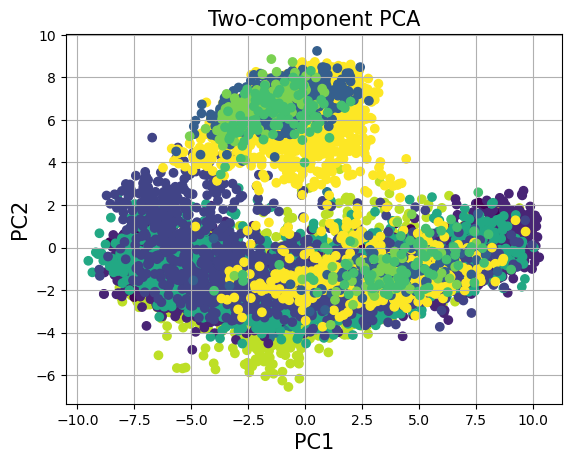

In [12]:
plt.scatter(pca_df.PC1, pca_df.PC2, c = df["Kingdom"])
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.grid();

### Conclusion:

But since new PCA components are created using all features there could be possibility of data loss and would require transforming input features to PCA components again for prediction. Also, we want to select and reduce feature list and we have high number of features in this dataset so we used other two techniques for feature selection and elimination.